In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from random import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import mean_squared_error, categorical_crossentropy

from sklearn.metrics import confusion_matrix
import itertools

2023-12-25 12:27:58.727168: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-25 12:27:58.729241: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 12:27:58.755467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 12:27:58.755497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 12:27:58.756308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Step 1: Making the data:

Take this following hypotheical covid test:

- $10\%$ people who took the test between the age $13$ to $60$ were found positive. 
- $90\%$ people who took the test between the age $60$ to $100$ were found postive. 
- All other people were found negative. 

Let's say we tested about a thousand people.

In [2]:
#creating a list of 
train_label = [] #whether it's +ve or -ve
train_sample = [] #age

N = 3000 #total number of tests
for i in range(N//10):
    sample_age = np.random.randint(13, 100)
    train_sample.append(sample_age)    
    if sample_age<60:
        rand = random()
        if rand<0.1:
            train_label.append(1)
        else:
            train_label.append(0)
    elif sample_age>=60:
        rand = random()
        if rand<0.9:
            train_label.append(1)
        else:
            train_label.append(0)

train_label = np.array(train_label)
train_sample = np.array(train_sample)

## Step 2: Data Processing

- First we shuffle both the datas.
- Scikit learn's fucntion `MaxMinScaler` will renormalise the data from $[13,100]$ to $[0,1]$.

In [3]:
# shuffle
train_label, train_sample = shuffle(train_label, train_sample)

#rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
train_sample_scaled = scaler.fit_transform(train_sample.reshape(-1,1))

## Step 3: Create an artificial Neural Network

- We will make a `Sequential` neural network, which means that it is layer by layer NN.
- We will have two hiddern `Dense` layers, Dense meaning that all the neurons are connected to all the neurons of the previous layers. 
- Input size is `(1,0)` as we have one feature, which is the age, and output is 2, the probability of being +ve and -ve respectively.

In [4]:
#create a sequential NN

#creating the layers
layer1 = Dense(16, input_shape=(1,), activation='relu')
layer2 = Dense(32, activation='relu')
layer3 = Dense(2, activation='softmax')

#creating the model
Model = Sequential([layer1, layer2, layer3])

## Step3: Compiling the Network

Compiling the network has these new parameters:
- `optimizer`: The optimiser is the extremum finding function basically. The approach is _Stochastic Gradient Descent_.
- `loss`: is our loss function indicating how far from true value our geuss is. 
- `learning_rate` is the step size of SGD.
- `matrics` is what to store while training. We will store `accuracy`.

In [5]:
Model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 4: Training the Network:
 - `x` input or samples:
 - `y` output or labels
 - `batch_size`: how big should a batch be
 - `epoch`: How many times the samples are going through

In [6]:
Model.fit(x=train_sample_scaled, y=train_label, batch_size=10, shuffle=True,epochs=40,verbose=2)

Epoch 1/40
30/30 - 0s - loss: 0.6991 - accuracy: 0.4633 - 407ms/epoch - 14ms/step
Epoch 2/40
30/30 - 0s - loss: 0.6973 - accuracy: 0.4500 - 29ms/epoch - 964us/step
Epoch 3/40
30/30 - 0s - loss: 0.6959 - accuracy: 0.3633 - 32ms/epoch - 1ms/step
Epoch 4/40
30/30 - 0s - loss: 0.6944 - accuracy: 0.2633 - 28ms/epoch - 949us/step
Epoch 5/40
30/30 - 0s - loss: 0.6929 - accuracy: 0.5000 - 27ms/epoch - 891us/step
Epoch 6/40
30/30 - 0s - loss: 0.6915 - accuracy: 0.5000 - 27ms/epoch - 906us/step
Epoch 7/40
30/30 - 0s - loss: 0.6901 - accuracy: 0.5000 - 29ms/epoch - 956us/step
Epoch 8/40
30/30 - 0s - loss: 0.6887 - accuracy: 0.5000 - 26ms/epoch - 877us/step
Epoch 9/40
30/30 - 0s - loss: 0.6873 - accuracy: 0.5000 - 27ms/epoch - 905us/step
Epoch 10/40
30/30 - 0s - loss: 0.6859 - accuracy: 0.4967 - 28ms/epoch - 924us/step
Epoch 11/40
30/30 - 0s - loss: 0.6844 - accuracy: 0.5167 - 26ms/epoch - 864us/step
Epoch 12/40
30/30 - 0s - loss: 0.6828 - accuracy: 0.5100 - 24ms/epoch - 812us/step
Epoch 13/40
30/

## Validation Set


In [7]:
Model.fit(x=train_sample_scaled, y=train_label,validation_split=0.1, batch_size=10, shuffle=True,epochs=40,verbose=2)

Epoch 1/40
27/27 - 0s - loss: 0.6330 - accuracy: 0.6630 - val_loss: 0.6307 - val_accuracy: 0.6667 - 135ms/epoch - 5ms/step
Epoch 2/40
27/27 - 0s - loss: 0.6311 - accuracy: 0.6630 - val_loss: 0.6290 - val_accuracy: 0.6667 - 56ms/epoch - 2ms/step
Epoch 3/40
27/27 - 0s - loss: 0.6292 - accuracy: 0.6630 - val_loss: 0.6271 - val_accuracy: 0.6667 - 38ms/epoch - 1ms/step
Epoch 4/40
27/27 - 0s - loss: 0.6272 - accuracy: 0.6630 - val_loss: 0.6253 - val_accuracy: 0.6667 - 35ms/epoch - 1ms/step
Epoch 5/40
27/27 - 0s - loss: 0.6253 - accuracy: 0.6667 - val_loss: 0.6236 - val_accuracy: 0.6667 - 43ms/epoch - 2ms/step
Epoch 6/40
27/27 - 0s - loss: 0.6233 - accuracy: 0.6741 - val_loss: 0.6218 - val_accuracy: 0.6667 - 37ms/epoch - 1ms/step
Epoch 7/40
27/27 - 0s - loss: 0.6213 - accuracy: 0.6741 - val_loss: 0.6199 - val_accuracy: 0.6667 - 44ms/epoch - 2ms/step
Epoch 8/40
27/27 - 0s - loss: 0.6191 - accuracy: 0.6778 - val_loss: 0.6181 - val_accuracy: 0.6667 - 35ms/epoch - 1ms/step
Epoch 9/40
27/27 - 0s -

## Inferance/ Predicting the value

- prepare the test data the same as train data

In [8]:
#creating a list of 
test_label = [] #whether it's +ve or -ve
test_sample = [] #age

N = 1000 #total number of tests
for i in range(N//10):
    sample_age = np.random.randint(13, 100)
    test_sample.append(sample_age)    
    if sample_age<60:
        rand = random()
        if rand<0.1:
            test_label.append(1)
        else:
            test_label.append(0)
    elif sample_age>=60:
        rand = random()
        if rand<0.95:
            test_label.append(1)
        else:
            test_label.append(0)

test_label = np.array(test_label)
test_sample = np.array(test_sample)

# shuffle
test_label, test_sample = shuffle(test_label, test_sample)

#rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
test_sample_scaled = scaler.fit_transform(test_sample.reshape(-1,1))

In [9]:
predictions = Model.predict(x=test_sample_scaled,batch_size=10, verbose=0)

In [10]:
predictions = np.argmax(predictions, axis=-1)

In [11]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [12]:
cm = confusion_matrix(y_true=test_label, y_pred=predictions)

In [13]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
cm_plot_labels = ['postive','negative']

Confusion matrix, without normalization
[[37 17]
 [ 3 43]]


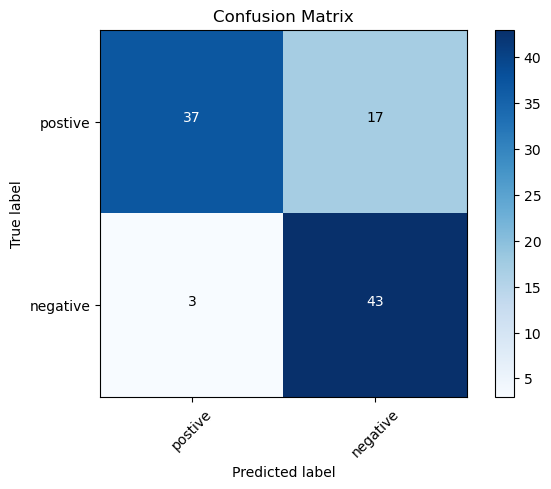

In [15]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')